In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import os.path
import os

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

pd.set_option("display.max_rows", 20)
#print(os.path.isfile('isis.csv'), "/iris.csv")
filename = os.getcwd() + "Iris.csv"
print(filename)
print(os.path.isfile(filename))
print(os.path.isfile('Iris.csv'))

import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)
iris = pd.read_csv("Iris.csv")
print(iris.shape)
print("The iris dataset has {} rows and {} columns.".format(iris.shape[0], iris.shape[1]))
iris

/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/Desktop/School/Semesters/Fall 2021/COMP 3625/ML EXIris.csv
False
True
Classification.ipynb
Iris.csv
(150, 6)
The iris dataset has 150 rows and 6 columns.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
iris.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [3]:
for col in iris.columns:
    print(col)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [4]:
print(iris.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
print(type(iris))
print(type(iris.Species))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
iris.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
iris.SepalLengthCm

In [ ]:
iris.SepalLengthCm.describe()

In [ ]:
iris.Species.describe()

In [7]:
print(type(iris.Species.value_counts()))
iris.Species.value_counts()

<class 'pandas.core.series.Series'>


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

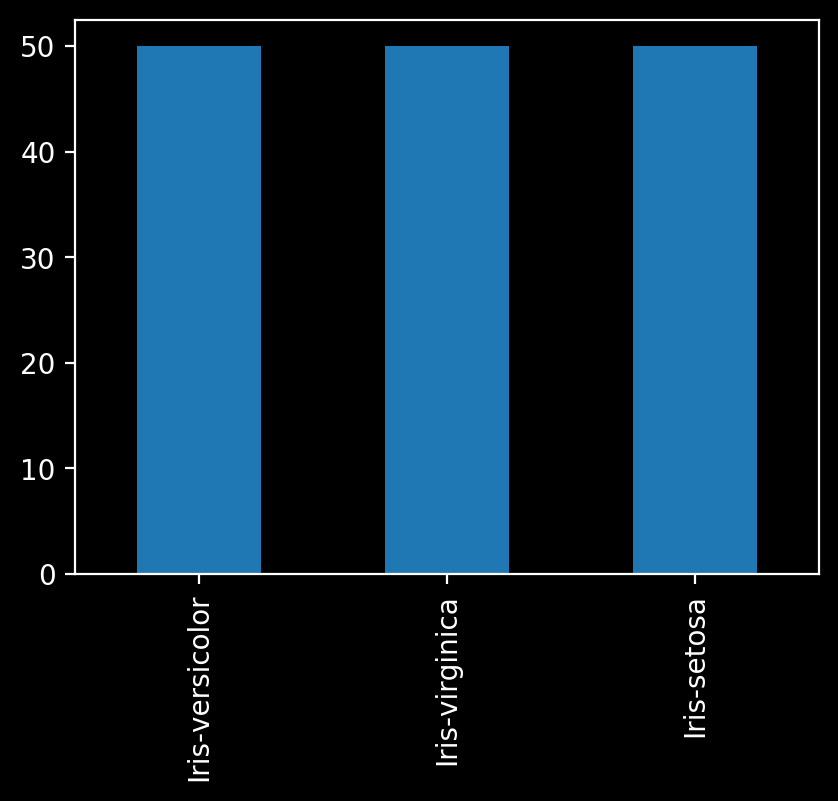

In [69]:
iris.Species.value_counts().plot(kind="bar")

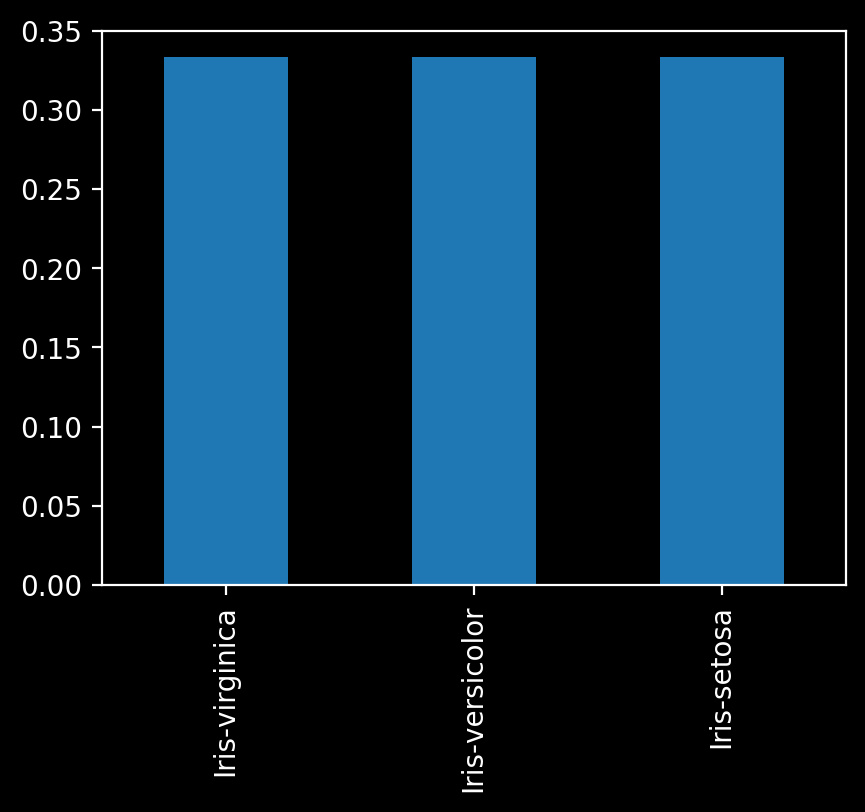

In [8]:
iris.Species.value_counts(normalize="true").plot(kind="bar")

In [9]:
pd.crosstab(iris.Species,iris.SepalLengthCm)

SepalLengthCm,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
Species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
Iris-versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
Iris-virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [10]:
pd.qcut(iris['SepalLengthCm'], q=3)

0      (4.2989999999999995, 5.4]
1      (4.2989999999999995, 5.4]
2      (4.2989999999999995, 5.4]
3      (4.2989999999999995, 5.4]
4      (4.2989999999999995, 5.4]
                 ...            
145                   (6.3, 7.9]
146                   (5.4, 6.3]
147                   (6.3, 7.9]
148                   (5.4, 6.3]
149                   (5.4, 6.3]
Name: SepalLengthCm, Length: 150, dtype: category
Categories (3, interval[float64]): [(4.2989999999999995, 5.4] < (5.4, 6.3] < (6.3, 7.9]]

In [11]:
iris['3_bin'] = pd.qcut(iris['SepalLengthCm'], q=3)
iris['5_bin'] = pd.qcut(iris['SepalLengthCm'], q=5)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin
0,1,5.1,3.5,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(5.0, 5.6]"
1,2,4.9,3.0,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
2,3,4.7,3.2,1.3,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
3,4,4.6,3.1,1.5,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"
4,5,5.0,3.6,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]"


In [12]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin
145,146,6.7,3.0,5.2,2.3,Iris-virginica,"(6.3, 7.9]","(6.52, 7.9]"
146,147,6.3,2.5,5.0,1.9,Iris-virginica,"(5.4, 6.3]","(6.1, 6.52]"
147,148,6.5,3.0,5.2,2.0,Iris-virginica,"(6.3, 7.9]","(6.1, 6.52]"
148,149,6.2,3.4,5.4,2.3,Iris-virginica,"(5.4, 6.3]","(6.1, 6.52]"
149,150,5.9,3.0,5.1,1.8,Iris-virginica,"(5.4, 6.3]","(5.6, 6.1]"


In [13]:
iris['5_bin'].value_counts()

(5.0, 5.6]                   33
(4.2989999999999995, 5.0]    32
(6.52, 7.9]                  30
(5.6, 6.1]                   30
(6.1, 6.52]                  25
Name: 5_bin, dtype: int64

In [14]:
cat_bins = ['Small', 'Medium', 'Large']
iris['sepal_bins'] = pd.qcut(iris['SepalLengthCm'], q=[0,0.4,0.8,1], labels=cat_bins)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,3_bin,5_bin,sepal_bins
0,1,5.1,3.5,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(5.0, 5.6]",Small
1,2,4.9,3.0,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
2,3,4.7,3.2,1.3,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
3,4,4.6,3.1,1.5,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small
4,5,5.0,3.6,1.4,0.2,Iris-setosa,"(4.2989999999999995, 5.4]","(4.2989999999999995, 5.0]",Small


In [15]:
iris.sepal_bins.value_counts()

Small     65
Medium    55
Large     30
Name: sepal_bins, dtype: int64

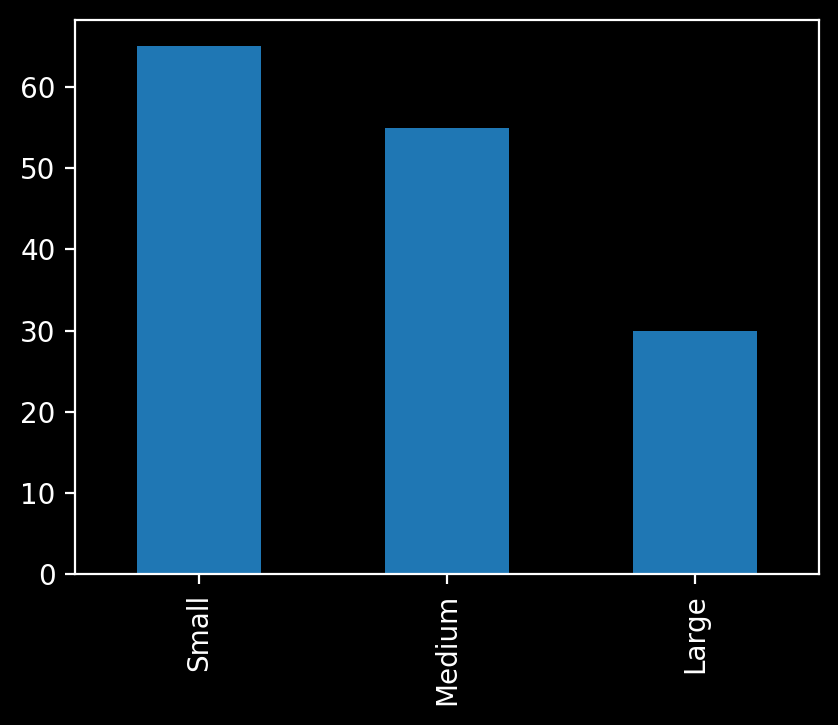

In [16]:
iris.sepal_bins.value_counts().plot(kind="bar")

In [17]:
pd.crosstab(iris.Species,iris.sepal_bins)

sepal_bins,Small,Medium,Large
Species,,,
Iris-setosa,47,3,0
Iris-versicolor,16,26,8
Iris-virginica,2,26,22


In [18]:
# Feature selection
#split dataset in features and target variable
#SepalLengthCm
#SepalWidthCm
#PetalLengthCm
#PetalWidthCm
#Species
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris[feature_cols] # Features
y = iris.Species # Target variable

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [20]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print("X_train = ", X_train.shape, "X_test= ", X_test.shape, "y_train = ", y_train.shape, "y_test = ", y_test.shape)

X_train =  (105, 4) X_test=  (45, 4) y_train =  (105,) y_test =  (45,)


In [22]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [23]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [25]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [26]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
# 1, 4,4,4,4 
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
t = {'SepalLengthCm':[1], 'SepalWidthCm':[1], 'PetalLengthCm':[4], 'PetalWidthCm':[4]}
trythis = pd.DataFrame(data=t)
trythis


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,1,4,4


In [28]:
trypred = clf.predict(trythis)
trypred

array(['Iris-virginica'], dtype=object)

In [29]:
# how good is it? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [30]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
            ...       
112     Iris-virginica
17         Iris-setosa
119     Iris-virginica
103     Iris-virginica
58     Iris-versicolor
Name: Species, Length: 45, dtype: object

In [31]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$

In [33]:
sp=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
confusion_matrix(y_test,y_pred, labels=sp)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [34]:
dazed = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=sp), 
    index=['true:setosa', 'true:versicolor', 'true:virginica'], 
    columns=['pred:setosa', 'pred:versicolo', 'pred:virginica']
)
print(dazed)

                 pred:setosa  pred:versicolo  pred:virginica
true:setosa               14               0               0
true:versicolor            0              17               1
true:virginica             0               1              12


In [35]:
New = pd.DataFrame({'SepalLengthCm': [7,4.8, 3.2], 
                   'SepalWidthCm': [7, 4.0, 3.5], 
                   'PetalLengthCm': [7,1.4,1.6], 
                   'PetalWidthCm': [7,0.5,0.5]})
New

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.0,7.0,7.0,7.0
1,4.8,4.0,1.4,0.5
2,3.2,3.5,1.6,0.5


In [37]:
trypred = clf.predict(New)
trypred

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)